# Feature Learning - Dimensionality Reduction

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

np.random.seed(0)

plt.style.use("ggplot")

In [0]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_circles

In [0]:
wine_data = load_wine()

In [19]:
wine_features = pd.DataFrame(wine_data["data"], columns=wine_data["feature_names"])
wine_targets = pd.DataFrame(wine_data["target"], columns=["class"])
print(wine_data["DESCR"])

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [20]:
wine_features.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [21]:
wine_features.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [22]:
wine_targets.head()

,class
0,0
1,0
2,0
3,0
4,0


In [23]:
wine_targets["class"].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(wine_features, wine_targets, test_size=0.2, random_state=0)

With the wine data, we will apply [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to 2 components to be able to visualize the data and then run a linear regression on the original data as well as PCA and compare their performances.

In [0]:
# Set pca_tf to the PCA transformer using 2 components (case matters)
# Fit and transform X_train and save to X_train_pca
# Transform X_test and save to X_test_pca
# YOUR CODE HERE
#raise NotImplementedError()

pca_tf = PCA(n_components=2,svd_solver='full')
X_train_pca = pca_tf.fit_transform(X_train)
X_test_pca = pca_tf.fit_transform(X_test)

In [0]:
assert pca_tf
assert X_train_pca.shape == (142, 2)
assert X_test_pca.shape == (36,2)

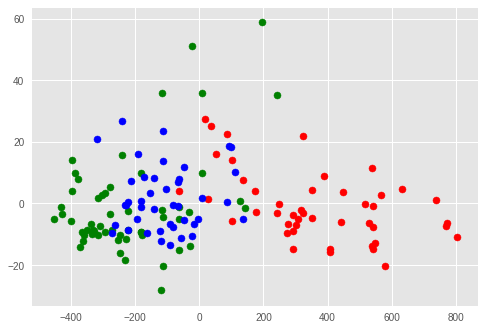

In [31]:
plt.scatter(X_train_pca[:,0].reshape(-1,1)[y_train == 0], X_train_pca[:,1].reshape(-1,1)[y_train == 0], color="r")
plt.scatter(X_train_pca[:,0].reshape(-1,1)[y_train == 1], X_train_pca[:,1].reshape(-1,1)[y_train == 1], color="g")
plt.scatter(X_train_pca[:,0].reshape(-1,1)[y_train == 2], X_train_pca[:,1].reshape(-1,1)[y_train == 2], color="b")
plt.show()

In [0]:
# Fit 2 linear regression models, lm and lm_pca on the X_train and X_train_pca data respectively.
# YOUR CODE HERE
#raise NotImplementedError()

lm = LinearRegression().fit(X_train,y_train)
lm_pca = LinearRegression().fit(X_train_pca,y_train)


In [0]:
assert lm
assert lm_pca
assert lm.coef_.shape == (1,13)
assert lm_pca.coef_.shape == (1,2)

In [44]:
print(f"The MSE using LM is {mean_squared_error(y_test, lm.predict(X_test))}.")
print(f"The MSE using LM PCA is {mean_squared_error(y_test, lm_pca.predict(X_test_pca))}.")

The MSE using LM is 0.11926651196023658.
The MSE using LM PCA is 0.30662204185755626.


PCA can help us visualize the data but it can come at a cost when we apply a machine learning model to its components. Often, the results are still worth the reduction in computation time when we have extremely large datasets. And sometimes we may achieve better results with PCA.

## Kernel PCA

In [0]:
X, y = make_circles(n_samples=400, factor=.3, noise=.05)
reds = y == 0
blues = y == 1

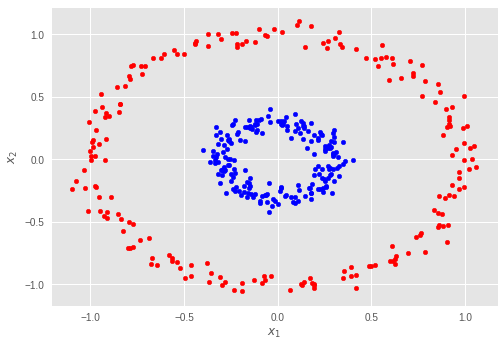

In [46]:
plt.scatter(X[reds, 0], X[reds, 1], c="r", s=20)
plt.scatter(X[blues, 0], X[blues, 1], c="b", s=20)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [0]:
# Apply a PCA transformation on X with 2 components
# Save the PCA transformer to pca_tf
# Save the transformed values of X to X_pca

# YOUR CODE HERE
# raise NotImplementedError()
pca_tf = PCA(n_components=2)
X_pca = pca_tf.fit_transform(X)


In [0]:
assert pca_tf
assert X_pca.shape == (400,2)

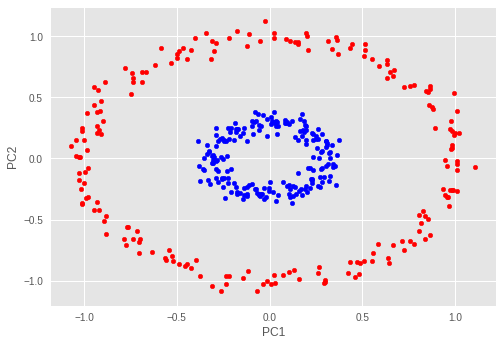

In [49]:
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="r", s=20)
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="b", s=20)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

We can see that there isn't much value in using traditional PCA. Let's try [kernel PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA). We'll use the RBF kernel and a gamma of 10. Also, set `fit_inverse_transform=True`.

In [0]:
# Apply a Kernel PCA transformation on X with 2 components
# Save the Kernel PCA transformer to kpca_tf
# Save the transformed values of X to X_kpca

# YOUR CODE HERE
#raise NotImplementedError()
kpca_tf = KernelPCA(n_components=2, kernel = 'rbf', gamma = 10, fit_inverse_transform=True)
X_kpca = kpca_tf.fit_transform(X)

In [0]:
assert kpca_tf
assert X_kpca.shape == (400,2)

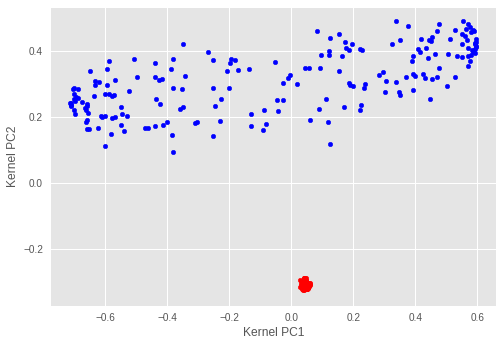

In [57]:
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="r", s=20)
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="b", s=20)
plt.xlabel("Kernel PC1")
plt.ylabel("Kernel PC2")
plt.show()

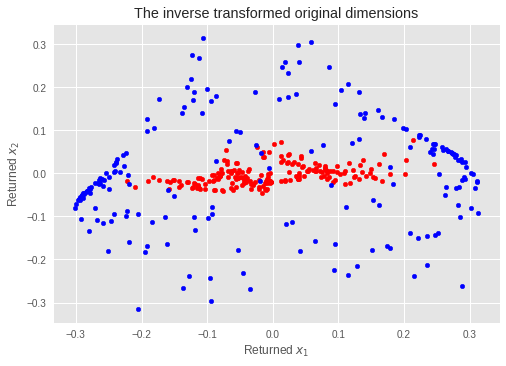

In [58]:
X_inverse = kpca_tf.inverse_transform(X_kpca)
plt.scatter(X_inverse[reds, 0], X_inverse[reds, 1], c="r", s=20)
plt.scatter(X_inverse[blues, 0], X_inverse[blues, 1], c="b", s=20)
plt.xlabel("Returned $x_1$ ")
plt.ylabel("Returned $x_2$")
plt.title("The inverse transformed original dimensions")
plt.show()

## Feedback

In [0]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    # YOUR CODE HERE
    raise NotImplementedError()